# Part one of the Mini-Project completed for LaunchCode's CoderGirl program for the Data Science track.

## This portion of the project entails performing exploratory data analysis on data from [UCI's Heart Disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci/version/1#). The intention of this project is to build a model (in part two) that can predict heart disease.

## --

## I. Importing the Data and Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

custom = sns.xkcd_palette(colors= ['sage green', 'coral', 'bluegrey', 'charcoal'])
alt_custom = sns.xkcd_palette(colors=['charcoal', 'sage green'])
coolwarm = sns.xkcd_palette(colors=['charcoal', 'coral'])

sns.set_style("dark")

In [2]:
data = pd.read_csv('heart.csv')
y = data.target
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The attribute information, available on the Kaggle page for the dataset, is as follows:
> 1. age
> 2. sex (1=male, 0=female)
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl (1=true, 0=false)
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The 'target' attribute is either 1 (heart disease) or 0 (no heart disease).

In [3]:
data.columns = ['age', 'sex', 'pain', 'bpRest', 'chol', 'sugar', 'restecg', 'hrMax', 'exAng', 'STdep', 'slopeST', 'vessels', 'thal', 'target']
data.drop(columns='restecg', inplace=True)
data.head()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1


I cleaned up the dataframe column titles to make more sense to me and be easier to read.
Some concepts required some more information than what was provided:
> 3. Chest pain type: 1=typical, 2=atypical, 3=non-anginal, 4=asymptomatic
> 10. ST depression refers to the deviation of the ST segment, recorded by an ECG, which is abnormally low.
> 13. 'Thal' is short for Thalassemia (I believe), which is an inherited blood disorder that causes one's blood to have lower hemoglobin than normal, thus carrying less oxygen. It can have varying degrees of severity (see above).

I could not find information regarding what the values for 'restecg' denote, so it has been dropped. (Typically I would make sure to find this information, but for the purposes of this project I am confident that I have enough data to create a capable model.)

# II. Cleaning the Data

In [4]:
data.describe()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Before I continue with any data cleaning, I want to make sure I'm not missing any values or have any other basic data issues:
* I can see from the counts of each feature that no values are missing.
* I can also see from a brief look over the columns that there are somewhat significant outliers in the "chol" and "STdep" columns.
* It is hard to tell if any duplicates exist from the description of the data, so I will have to do a check for those.

In [5]:
# Check for outliers
chol_outliers = data[data['chol'] > data['chol'].mean() + 3 * data['chol'].std()]
STdep_outliers = data[data['STdep'] > data['STdep'].mean() + 3 * data['STdep'].std()]
print(chol_outliers, STdep_outliers)

     age  sex  pain  bpRest  chol  sugar  hrMax  exAng  STdep  slopeST  \
28    65    0     2     140   417      1    157      0    0.8        2   
85    67    0     2     115   564      0    160      0    1.6        1   
220   63    0     0     150   407      0    154      0    4.0        1   
246   56    0     0     134   409      0    150      1    1.9        1   

     vessels  thal  target  
28         1     2       1  
85         0     3       1  
220        3     3       0  
246        2     3       0        age  sex  pain  bpRest  chol  sugar  hrMax  exAng  STdep  slopeST  \
204   62    0     0     160   164      0    145      0    6.2        0   
221   55    1     0     140   217      0    111      1    5.6        0   

     vessels  thal  target  
204        3     3       0  
221        0     3       0  


In [6]:
# Drop outliers
data.drop([28, 85, 220, 246, 204, 221], inplace=True)

In [7]:
# Check for duplicates
data[data.duplicated(keep=False)]

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target
163,38,1,2,138,175,0,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,173,0,0.0,2,4,2,1


In [8]:
# Drop the duplicates found
data = data.drop_duplicates()

In [9]:
data.describe()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.280405,0.692568,0.969595,131.435811,244.138514,0.148649,149.638514,0.327703,0.996284,1.408784,0.702703,2.304054,0.547297
std,9.063192,0.462212,1.032894,17.589941,45.652903,0.356344,23.010854,0.470171,1.086412,0.609354,0.994626,0.612400,0.498601
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,152.500000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,394.000000,1.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


I chose to drop the outliers from the 'chol' and 'STdep' columns because I want to ensure the reliability of my model.

I also chose to drop the duplicate row of data, so as to prevent any level of bias that data point may have added to the results.

## III. Visualizing the Relationships of the Features to the Target Data

*Open image in new tab for closer viewing.*
<img src='Heart-Disease-Overview.png'>

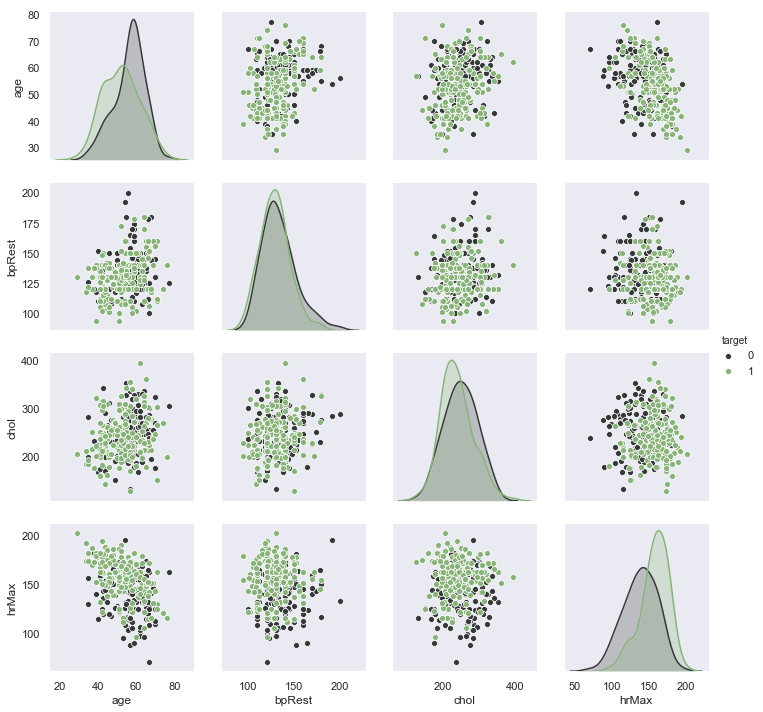

In [10]:
# Plot with only non-categorical variables
a = sns.pairplot(data, vars=['age', 'bpRest', 'chol', 'hrMax'], palette=alt_custom, hue='target')

plt.rcParams['figure.figsize'] = (10, 10)

Text(0.5, 1.0, 'Heatmap of Correlations')

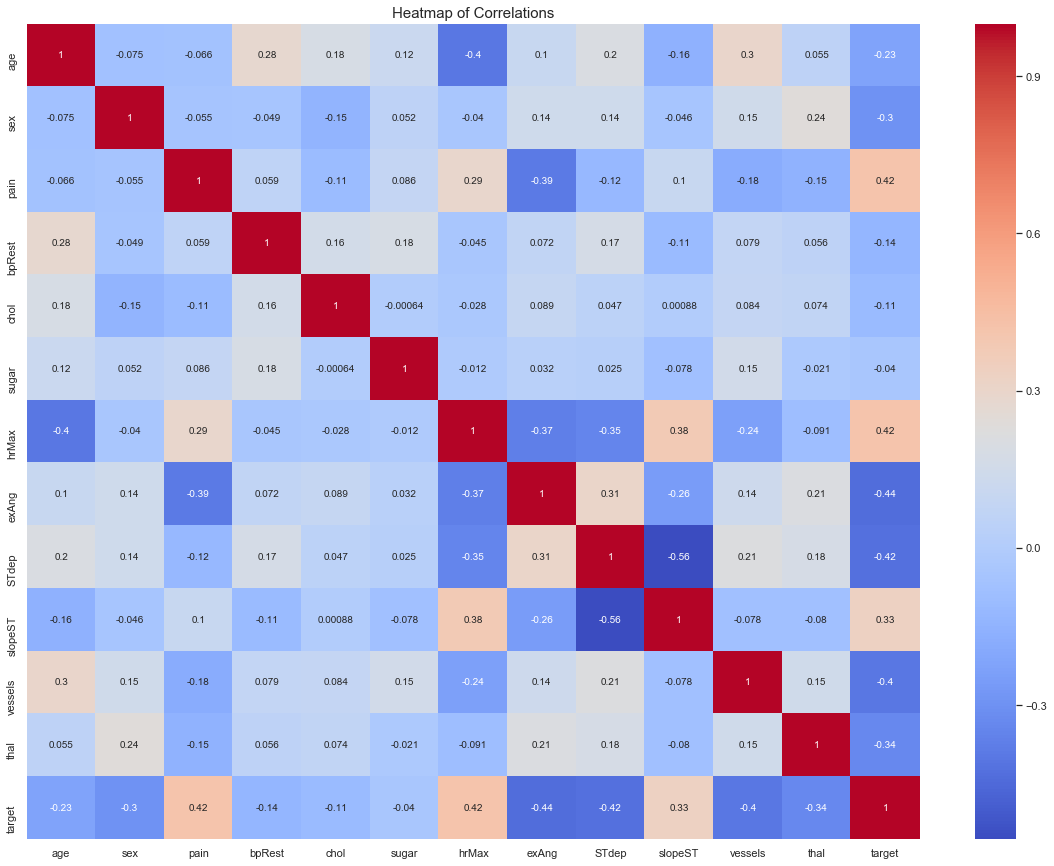

In [11]:
# Correlation Heatmap
corr = data.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', ax=ax, annot=True)
ax.set_title("Heatmap of Correlations", size=15)

Since I am able to spot several moderate correlations from the heatmap between the target feature and others, I will focus the remainder of my analysis on the following features and their relationship to the target:
* Pain Type
* Maximum Heart Rate Achieved
* Exercise-Induced Angina
* ST Depression (induced by exercise)
* Number of Major Vessels (colored by flouroscopy)

I will also include a simple distribution of how age and sex relate to the presence of heart disease in this dataset, for the sake of providing an overview of the sample population.

### Heart Disease by Age & Sex

In [10]:
# Create a new feature, 'age_group', to simplify the visualization of age distribution
data['age_group'] = data['age'].apply(lambda value: '30\'s' if value <=39
                                     else '40\'s' if value <=49
                                     else '50\'s' if value <=59
                                     else '60\'s' if value <=69
                                     else '70\'s')
data['age_group'] = pd.Categorical(data['age_group'], categories=['30\'s', '40\'s', '50\'s', '60\'s', '70\'s'])

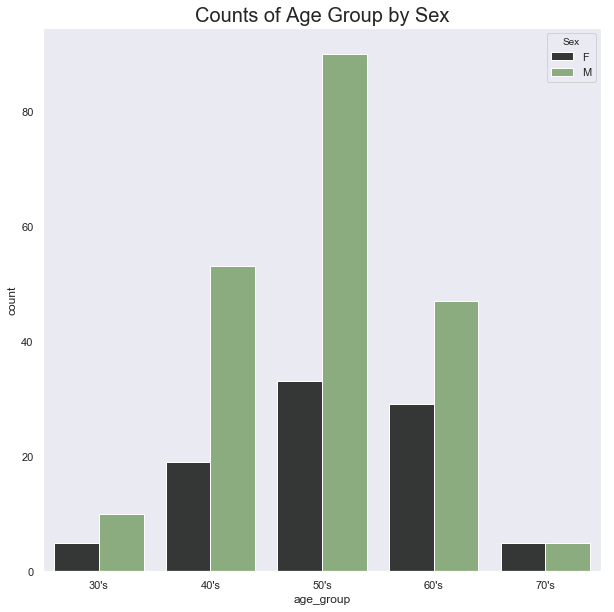

In [13]:
# Distribution of ages by sex

a = sns.countplot(x='age_group', hue='sex', palette=sns.color_palette(alt_custom), data=data)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Counts of Age Group by Sex', size=20)
a.legend('F'+'M', title='Sex')

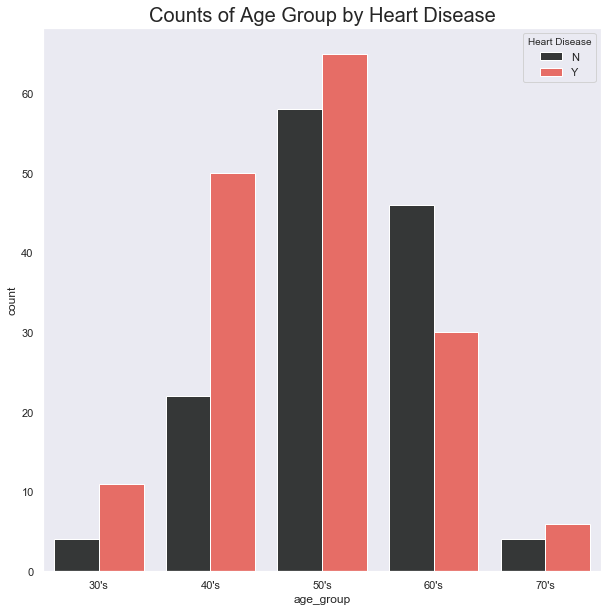

In [14]:
# Distribution of ages by presence of heart disease
plt.rcParams['figure.figsize'] = (10, 10)
a = sns.countplot(x='age_group', hue='target', palette=sns.color_palette(coolwarm), data=data)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Counts of Age Group by Heart Disease', size=20)
a.legend('N'+'Y', title='Heart Disease')

### Heart Disease by Pain Type

In [15]:
# Create filter to visualize pain by presence of heart disease
no_hd = data['target']==0
hd = data['target']==1

# Use filters to split data into groups of pain types by heart disease
no_hd_pain = data.pain.where(no_hd)
hd_pain = data.pain.where(hd)

Text(0.5, 1.0, 'Counts of Pain Type (No Heart Disease)')

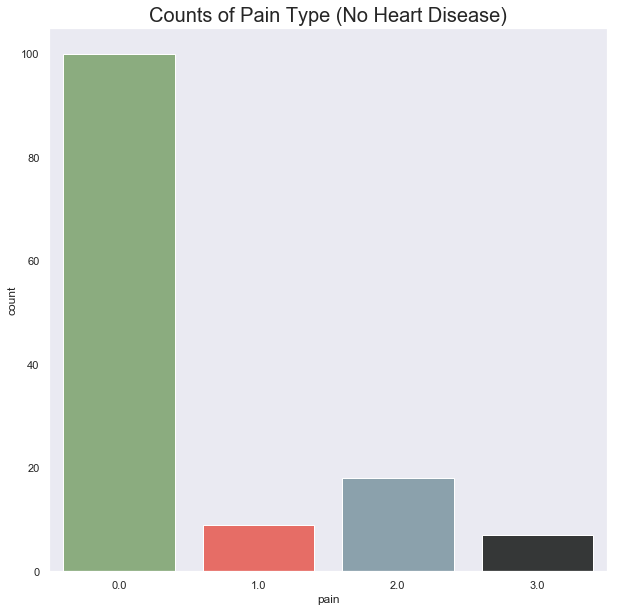

In [16]:
# Visualize pain type for those with no heart disease
sns.countplot(no_hd_pain, palette=custom)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Counts of Pain Type (No Heart Disease)', size=20)

Text(0.5, 1.0, 'Counts of Pain Type (Heart Disease)')

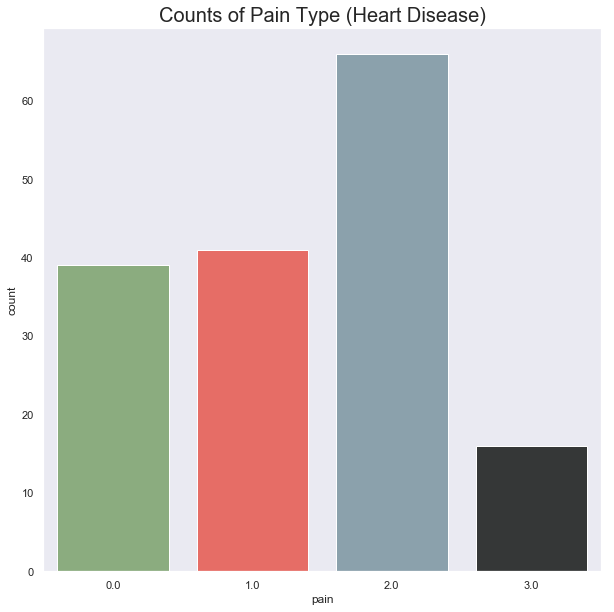

In [17]:
# Visualize pain type by those with heart disease
sns.countplot(hd_pain, palette=custom)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Counts of Pain Type (Heart Disease)', size=20)

### Heart Disease by Maximum Heart Rate Achieved

In [18]:
# Bin the hrMax data points into sets of ranges
data['hrMax_bins'] = data['hrMax'].apply(lambda x: '70-84' if x <= 84
                                        else '85-99' if x <= 99
                                        else '100-119' if x <= 119
                                        else '120-139' if x <= 139
                                        else '140-159' if x <= 159
                                        else '160-179' if x <= 179
                                        else '180-202')

In [11]:
# Bin the hrMax data points into sets of ranges
hrMax_high_list = []
hrMax_norm_list = []

for index, row in data.iterrows():
    if (220 - row['age'] >= row['hrMax']):
        hrMax_norm_list.append(row['hrMax'])
    else:
        hrMax_norm_list.append('high')
    
for index, row in data.iterrows():
    if (220 - row['age'] < row['hrMax']):
        hrMax_high_list.append(row['hrMax'])
    else:
        hrMax_high_list.append('normal')
        
data['hrMax_high'] = hrMax_high_list
data['hrMax_norm'] = hrMax_norm_list

In [12]:
data.head()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target,age_group,hrMax_high,hrMax_norm
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1,60's,normal,150
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1,30's,187,high
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,40's,normal,172
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1,50's,178,high
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1,50's,normal,163


In [29]:
data.head()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target,age_group,hrMax_high,hrMax_norm,hrMax_norm_by_age_group
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1,60's,normal,150,NaN
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1,30's,187,high,NaN
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,40's,normal,172,NaN
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1,50's,178,high,NaN
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1,50's,normal,163,NaN


In [47]:
# input: age
# output: age rounded to nearest multiple of five
def round_age(x, base=5):
    return base * round(x/base)

In [48]:
# Check if hrMax is higher than the average maximum heart rate for age group, based on AHS guidelines (maximum heart rate = 220 - age)
# input: age and hrMax
# output: 0 (hrMax not higher than average) or 1 (hrMax higher than average)
def check_hrMax_high(age, hrMax):
    is_above_max = 0
    rounded_age = round_age(age)
    
    if hrMax > 220 - rounded_age:
        is_above_max = 1
    else:
        is_above_max = 0
    
    return is_above_max

In [49]:
hrMax_high_list = []

for index, row in data.iterrows():
    hrMax_high_list.append(check_hrMax_high(row['age'], row['hrMax']))

data['hrMax_high'] = hrMax_high_list

hrMax_norm_list = []


,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target,age_group,hrMax_bins,hrMax_high
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1,60's,140-159,0
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1,30's,180-202,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,40's,160-179,0
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1,50's,160-179,1
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1,50's,160-179,0


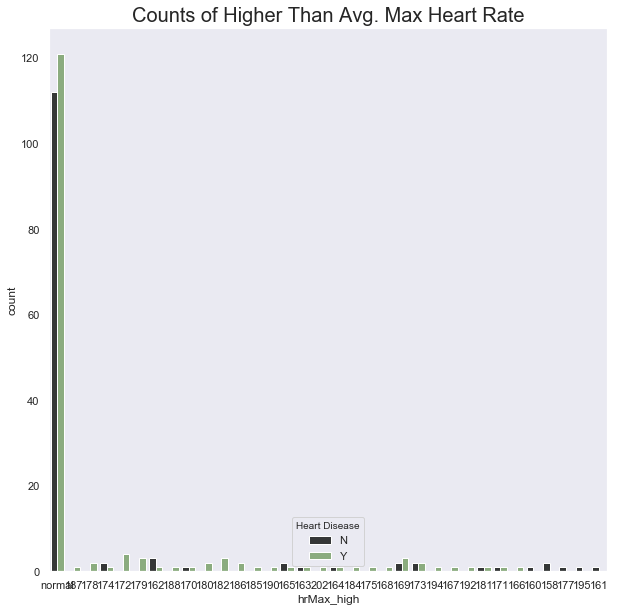

In [24]:
plt.rcParams['figure.figsize'] = (10, 10)
a = sns.countplot('hrMax_high', hue='target', palette=sns.color_palette(alt_custom), data=data)

plt.rcParams['figure.figsize'] = (100, 100)
plt.title('Counts of Higher Than Avg. Max Heart Rate', size=20)
a.legend('N'+'Y', title='Heart Disease')

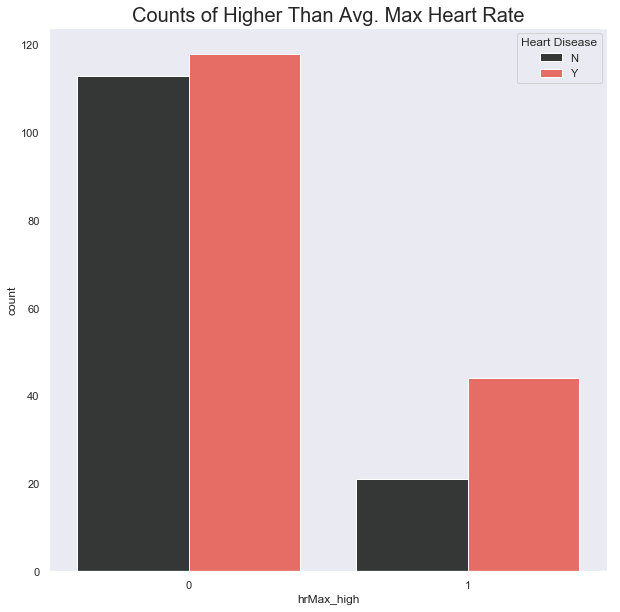

In [90]:
plt.rcParams['figure.figsize'] = (10, 10)
a = sns.countplot('hrMax_high', hue='target', palette=coolwarm, data=data)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Counts of Higher Than Avg. Max Heart Rate', size=20)
a.legend('N'+'Y', title='Heart Disease')

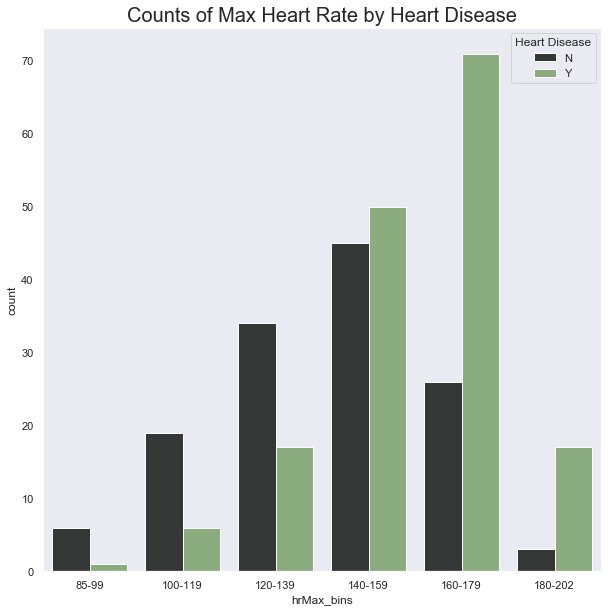

In [79]:
plt.rcParams['figure.figsize'] = (10, 10)
a = sns.countplot('hrMax_bins', hue='target', palette=sns.color_palette(alt_custom), data=data, order=['85-99', '100-119', '120-139', '140-159',
                                                            '160-179', '180-202'])

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Counts of Max Heart Rate by Heart Disease', size=20)
a.legend('N'+'Y', title='Heart Disease')

### Heart Disease by Presence of Exercise Induced Angina

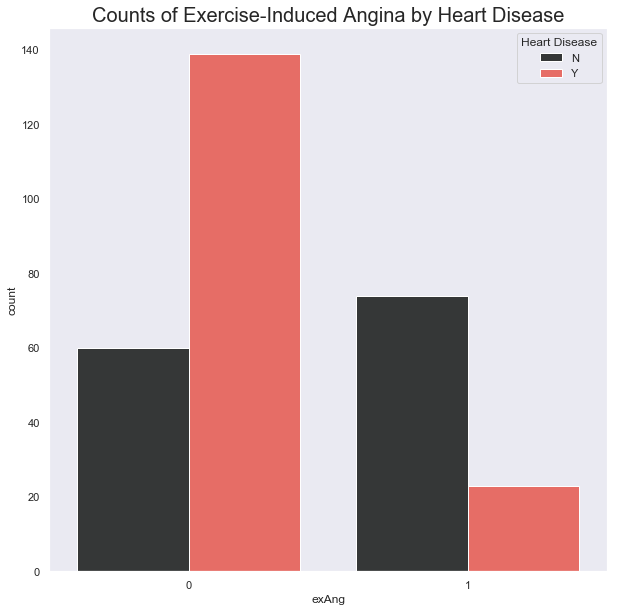

In [52]:
plt.rcParams['figure.figsize'] = (10, 10)
a = sns.countplot('exAng', hue='target', palette=sns.color_palette(coolwarm), data=data)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Counts of Exercise-Induced Angina by Heart Disease', size=20)
a.legend('N'+'Y', title='Heart Disease')

### Heart Disease by Depression of the ST Curve

In [53]:
data['STdep_bins'] = data['STdep'].apply(lambda x: 0 if x <= .4
                                        else 1 if x <= 1.4
                                        else 2 if x <= 2.4
                                        else 3 if x <= 3.4
                                        else 4)

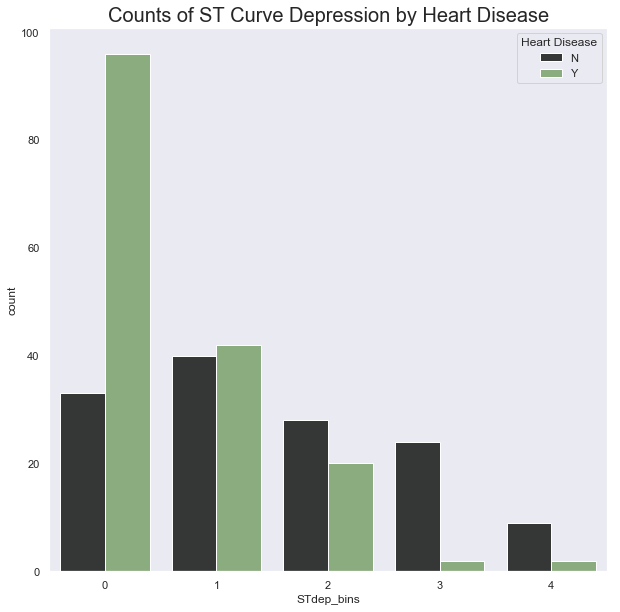

In [54]:
a = sns.countplot('STdep_bins', hue='target', palette=sns.color_palette(alt_custom), data=data)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Counts of ST Curve Depression by Heart Disease', size=20)
a.legend('N'+'Y', title='Heart Disease')

### Heart Disease by Number of Major Vessels Colored by Fluoroscopy

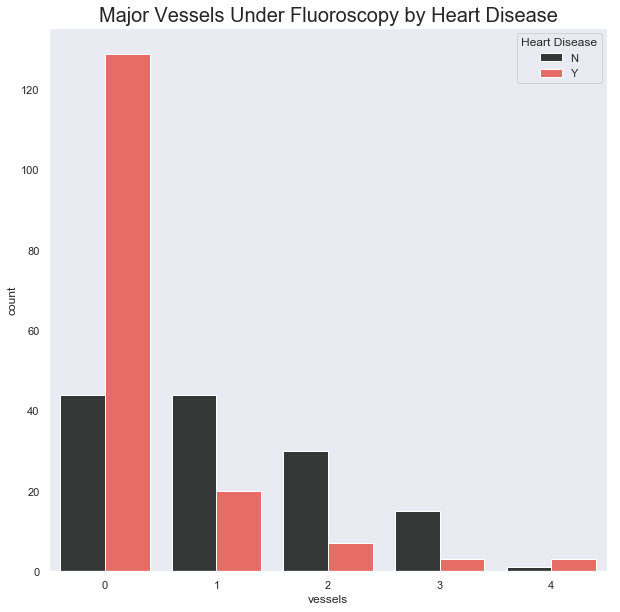

In [55]:
a = sns.countplot('vessels', hue='target', palette=sns.color_palette(coolwarm), data=data)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Major Vessels Under Fluoroscopy by Heart Disease', size=20)
a.legend('N'+'Y', title='Heart Disease')

## IV. Conclusion

Based on the exploration of the previous five features, I can see some strong correlations with the target feature and have the information I need to move forward into the modeling stage.

In [56]:
data.to_csv('data')